# Fourier series

In Part III, Computing with Functions, we work with approximating functions by expansions in
bases: that is, instead of approximating at a grid (as in the Differential Equations chapter),
we approximate functions by other, simpler, functions. The most fundamental basis is (complex) Fourier
series:
$$
f(θ) = ∑_{k = -∞}^∞ f̂ₖ {\rm e}^{{\rm i} k θ}
$$
where
$$
f̂ₖ := {1 \over 2π} ∫_0^{2π} f(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ
$$
In numerical analysis we try to build on the analogy with linear algebra as much as possible.
Therefore we write this as:
$$
f(θ) = \underbrace{[⋯ | {\rm e}^{-2{\rm i}θ} |{\rm e}^{-{\rm i}θ} | \underline 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯]}_{F(θ)}
\underbrace{\begin{bmatrix} ⋮ \\ f̂_{-2} \\ f̂_{-1} \\ \underline{f̂_0} \\ f̂_1 \\ f̂_2 \\ ⋮ \end{bmatrix}}_𝐟̂
$$
where the underline indicates the zero-index location.

More precisely, we are going to build an approximation using $n$ approximate coefficients $f̂_k^n ≈ f̂_k$.
We separate this into three cases:
1. Odd: If $n = 2m+1$ we approximate
$$
\begin{align*}
f(θ) &≈ ∑_{k = -m}^{m} f̂ₖ^n {\rm e}^{{\rm i} k θ} \\
    &= \underbrace{[ {\rm e}^{-{\rm i}mθ} | ⋯ | {\rm e}^{-2{\rm i}θ} |{\rm e}^{-{\rm i}θ} | 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯ |  {\rm e}^{{\rm i} m θ}]}_{F_{-m:m}(θ)} \begin{bmatrix} f̂_{-m}^n \\ ⋮ \\ f̂_m^n \end{bmatrix}
\end{align*}
$$
2. Even: If $n = 2m$ we approximate
$$
\begin{align*}
f(θ) &≈ ∑_{k = -m}^{m-1} f̂ₖ^n {\rm e}^{{\rm i} k θ} \\
    &= \underbrace{[ {\rm e}^{-{\rm i}mθ} | ⋯ | {\rm e}^{-2{\rm i}θ} |{\rm e}^{-{\rm i}θ} | 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯ |  {\rm e}^{{\rm i} (m-1) θ}]}_{F_{-m:m-1}(θ)} \begin{bmatrix} f̂_{-m}^n \\ ⋮ \\ f̂_{m-1}^n \end{bmatrix}
\end{align*}
$$
3. Taylor: if we know the negative coefficients vanish ($0 = f̂_{-1} = f̂_{-2} = ⋯$) we approximate
$$
\begin{align*}
f(θ) &≈ ∑_{k = 0}^{n-1} f̂ₖ^n {\rm e}^{{\rm i} k θ} \\
    &= \underbrace{[ 1 | {\rm e}^{{\rm i}θ} | {\rm e}^{2{\rm i}θ} | ⋯ |  {\rm e}^{{\rm i} (n-1) θ}]}_{F_{0:n-1}(θ)} \begin{bmatrix} f̂_0^n \\ ⋮ \\ f̂_{n-1}^n \end{bmatrix}
\end{align*}
$$
This can be thought of as an approximate Taylor expansion using the change-of-variables $z = {\rm e}^{{\rm i}θ}$.

## 1. Basics of Fourier series



In analysis one typically works with continuous functions and relates results to continuity.
In numerical analysis we inheritely have to work with _vectors_, so it is more natural
to  focus on the case where the _Fourier coefficients_ $f̂_k$ are _absolutely convergent_,
or in otherwords, the $1$-norm of $𝐟̂$ is bounded:
$$
\|𝐟̂\|_1 = ∑_{k=-∞}^∞ |f̂_k| < ∞
$$

We first state a basic results (whose proof is beyond the scope of this module):


**Theorem (convergence)**
If the Fourier coeffients are absolutely convergent then
$$
f(θ) = ∑_{k = -∞}^∞ f̂ₖ {\rm e}^{{\rm i} k θ},
$$
which converges uniformly.

**Remark (advanced)** We also have convergence for the continuous version
of the $2$-norm,
$$
\| f \|_2 := \sqrt{\int_0^{2π} |f(θ)|^2 {\rm d} θ},
$$
for any function such that $\| f \|_2 < ∞$, but we won't need that in
what follows.


Fortunately, continuity gives us sufficient (though not necessary) conditions for absolute convergence:

**Proposition (differentiability and absolutely convergence)** If $f : ℝ → ℂ$ and $f'$ are periodic
 and $f''$ is uniformly bounded, then its Fourier coefficients satisfy
$$
\|𝐟̂\|₁ < ∞
$$

**Proof**
Integrate by parts twice using the fact that $f(0) = f(2π)$, $f'(0) = f(2π)$:
$$
\begin{align*}
f̂ₖ &= ∫_0^{2π} f(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ =
[f(θ) {\rm e}^{-{\rm i} k θ}]_0^{2π} + {1 \over {\rm i} k} ∫_0^{2π} f'(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ \\
&= {1 \over {\rm i} k} [f'(θ) {\rm e}^{-{\rm i} k θ}]_0^{2π} - {1 \over k^2} ∫_0^{2π} f''(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ \\
&= - {1 \over k^2} ∫_0^{2π} f''(θ) {\rm e}^{-{\rm i} k θ} {\rm d}θ
\end{align*}
$$
thus uniform boundedness of $f''$ guarantees $|f̂ₖ| ≤ M |k|^{-2}$ for some $M$, and we have
$$
∑_{k = -∞}^∞ |f̂ₖ| ≤ |f̂_0|  + 2M ∑_{k = 1}^∞ |k|^{-2}  < ∞.
$$
using the dominant convergence test.

∎

This condition can be weakened to Lipschitz continuity but the proof is  beyond the scope
of this module.
Of more practical importance is the other direction: the more times differentiable a function the
faster the coefficients decay, and thence the faster Fourier series converges.
In fact, if a function is smooth and 2π-periodic its Fourier coefficients decay
faster than algebraically: they decay like $O(k^{-λ})$ for any $λ$. This will be explored in the
problem sheet.

**Remark (advanced)** Going further, if we let $z = {\rm e}^{{\rm i} θ}$ then if $f(z)$ is _analytic_ in a
neighbourhood of the unit circle the Fourier coefficients decay _exponentially fast_. And if $f(z)$ is entire
they decay even faster than exponentially.


## 2. Trapezium rule and discrete Fourier coefficients

Let $θ_j = 2πj/n$ for $j = 0,1,…,n$ denote $n+1$ evenly spaced points over $[0,2π]$.
The _Trapezium rule_ over $[0,2π]$ is the approximation:
$$
∫_0^{2π} f(θ) {\rm d}θ ≈ {2 π \over n} \left[{f(0) \over 2} + ∑_{j=1}^{n-1} f(θ_j) + {f(2 π) \over 2} \right]
$$
But if $f$ is periodic we have $f(0) = f(2π)$ we get the _periodic Trapezium rule_:
$$
∫_0^{2π} f(θ) {\rm d}θ ≈ 2 π\underbrace{{1 \over n} ∑_{j=0}^{n-1} f(θ_j)}_{Σ_n[f]}
$$
Define the Trapezium rule approximation to the Fourier coefficients by:
$$
f̂_k^n := Σ_n[f(θ) {\rm e}^{-i k θ}]  = {1 \over n} ∑_{j=0}^{n-1} f(θ_j) {\rm e}^{-i k θ_j}
$$

**Lemma (Discrete orthogonality)**
We have:
$$
∑_{j=0}^{n-1} {\rm e}^{i k θ_j} = \begin{cases} n & k = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}
$$
In other words,
$$
Σ_n[{\rm e}^{i (k-j) θ_j}] = \begin{cases} 1 & k-j = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}.
$$

**Proof**

Consider $ω := {\rm e}^{{\rm i} θ_1} = {\rm e}^{2 π {\rm i} \over n}$. This is an $n$ th root of unity: $ω^n = 1$.  Note that ${\rm e}^{{\rm i} θ_j} ={\rm e}^{2 π {\rm i} j \over n}= ω^j$.

(Case 1: $k = pn$ for an integer $p$)
We have
$$
∑_{j=0}^{n-1} {\rm e}^{i k θ_j} = ∑_{j=0}^{n-1} ω^{kj} = ∑_{j=0}^{n-1} ({ω^{pn}})^j =   ∑_{j=0}^{n-1} 1 = n
$$
(Case 2 $k ≠ pn$ for an integer $p$)  Recall that
$$
∑_{j=0}^{n-1} z^j = {z^n-1 \over z-1}.
$$
Then we have
$$
∑_{j=0}^{n-1} {\rm e}^{i k θ_j} = ∑_{j=0}^{n-1} (ω^k)^j = {ω^{kn} -1 \over ω^k -1} = 0.
$$
where we use the fact that $k$ is not a multiple of $n$ to guarantee that $ω^k ≠ 1$.

∎


**Theorem (discrete Fourier coefficients)**
If $𝐟̂$ is absolutely convergent then
$$
f̂_k^n = ⋯ + f̂_{k-2n} + f̂_{k-n} + f̂_k + f̂_{k+n} + f̂_{k+2n} + ⋯
$$

**Proof**
$$
\begin{align*}
f̂_k^n &= Σ_n[f(θ) {\rm e}^{-i k θ}] = ∑_{j=-∞}^∞ f̂_j Σ_n[f(θ) {\rm e}^{i (j-k) θ}] \\
&= ∑_{j=-∞}^∞ f̂_j \begin{cases} 1 & j-k = \ldots,-2n,-n,0,n,2n,\ldots  \cr
0 & \hbox{otherwise}
\end{cases}
\end{align*}
$$
∎

Note that there is redundancy:

**Corollary (aliasing)**
For all $p ∈ ℤ$, $f̂_k^n = f̂_{k+pn}^n$.


In other words if we know $f̂_0^n, …, f̂_{n-1}^n$, we know $f̂_k^n$ for all $k$ via a permutation,
for example if $n = 2m+1$ we have
$$
\begin{bmatrix}
f̂_{-m}^n \\
⋮\\
f̂_m^n
\end{bmatrix} = \underbrace{\begin{bmatrix} &&& 1 \\ &&& ⋱ \\ &&&& 1 \\
    1 \\ & ⋱ \\ && 1 \end{bmatrix}}_{P_σ}
\begin{bmatrix}
f̂_0^n \\
⋮\\
f̂_{n-1}^n
\end{bmatrix}
$$
where $σ$ has Cauchy notation (_Careful_: we are using 1-based indexing here):
$$
\begin{pmatrix}
1 & 2 & ⋯ & m & m+1 & m+2 & ⋯ & n  \\
m+2 & m+3 & ⋯ & n & 1 & 2 & ⋯ & m+1
\end{pmatrix}.
$$



We first discuss the case when all negative coefficients are zero,
noting that the Fourier series is in fact a Taylor series if we let $z = {\rm e}^{{\rm i} θ}$:
$$
f(z) = \sum_{k=0}^∞ f̂_k z^k.
$$
That is, $f̂_0^n, …, f̂_{n-1}^n$ are approximations of the Taylor series coefficients by evaluating
on the boundary.



We can  prove _convergence_ whenever of this
approximation whenever $f$ has absolutely summable coefficients.
We will prove the result here in the special case where the negative
coefficients are zero.


**Theorem (Taylor series converges)**
If $0 = f̂_{-1} = f̂_{-2} = ⋯$ and $𝐟̂$ is absolutely convergent then
$$
f_n(θ) = ∑_{k=0}^{n-1} f̂_k^n {\rm e}^{{\rm i} k θ}
$$
converges uniformly to $f(θ)$.

**Proof**

$$
\begin{align*}
|f(θ) - f_n(θ)| = |∑_{k=0}^{n-1} (f̂_k - f̂_k^n) {\rm e}^{{\rm i} k θ} + ∑_{k=n}^∞ f̂_k {\rm e}^{{\rm i} k θ}|
= |∑_{k=n}^∞ f̂_k ({\rm e}^{{\rm i} k θ} - {\rm e}^{{\rm i} {\rm mod}(k,n) θ})|
≤ 2 ∑_{k=n}^∞ |f̂_k|
\end{align*}
$$
which goes to zero as $n → ∞$.
∎

For the general case we need to choose a range of coefficients that includes roughly an equal number of
negative and positive coefficients (preferring negative over positive in a tie as a convention):
$$
f_n(θ) = ∑_{k=-⌈n/2⌉}^{⌊n/2⌋} f̂ₖ {\rm e}^{{\rm i} k θ}
$$
In the problem sheet we will prove this converges provided the coefficients are absolutely convergent.







## 3. Discrete Fourier transform and interpolation

We note that the map from values to coefficients can be defined as a matrix-vector product using the DFT:


**Definition (DFT)**
The _Discrete Fourier Transform (DFT)_ is defined as:
$$
\begin{align*}
Q_n &:= {1 \over √n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & {\rm e}^{-{\rm i} θ_1} & {\rm e}^{-{\rm i} θ_2} & ⋯ & {\rm e}^{-{\rm i} θ_{n-1}} \\
                                    1 & {\rm e}^{-{\rm i} 2 θ_1} & {\rm e}^{-{\rm i} 2 θ_2} & ⋯ & {\rm e}^{-{\rm i} 2θ_{n-1}} \\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & {\rm e}^{-{\rm i} (n-1) θ_1} & {\rm e}^{-{\rm i} (n-1) θ_2} & ⋯ & {\rm e}^{-{\rm i} (n-1) θ_{n-1}}
\end{bmatrix} \\
&= {1 \over √n} \begin{bmatrix} 1 & 1 & 1&  ⋯ & 1 \\
                                    1 & ω^{-1} & ω^{-2} & ⋯ & ω^{-(n-1)}\\
                                    1 & ω^{-2} & ω^{-4} & ⋯ & ω^{-2(n-1)}\\
                                    ⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
                                    1 & ω^{-(n-1)} & ω^{-2(n-1)} & ⋯ & ω^{-(n-1)^2}
\end{bmatrix}
\end{align*}
$$
for the $n$-th root of unity $ω = {\rm e}^{{\rm i} π/n}$. Note that
$$
\begin{align*}
Q_n^⋆ &= {1 \over √n} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & {\rm e}^{{\rm i} θ_1} & {\rm e}^{{\rm i} 2 θ_1} & ⋯ & {\rm e}^{{\rm i} (n-1) θ_1} \\
1 &  {\rm e}^{{\rm i} θ_2}  & {\rm e}^{{\rm i} 2 θ_2} & ⋯ & {\rm e}^{{\rm i} (n-1)θ_2} \\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & {\rm e}^{{\rm i} θ_{n-1}} & {\rm e}^{{\rm i} 2 θ_{n-1}} & ⋯ & {\rm e}^{{\rm i} (n-1) θ_{n-1}}
\end{bmatrix} \\
&= {1 \over √n} \begin{bmatrix}
1 & 1 & 1&  ⋯ & 1 \\
1 & ω^{1} & ω^{2} & ⋯ & ω^{(n-1)}\\
1 & ω^{2} & ω^{4} & ⋯ & ω^{2(n-1)}\\
⋮ & ⋮ & ⋮ & ⋱ & ⋮ \\
1 & ω^{(n-1)} & ω^{2(n-1)} & ⋯ & ω^{(n-1)^2}
\end{bmatrix}
\end{align*}
$$

That is, we have
$$
\underbrace{\begin{bmatrix} f_0^n \\ ⋮ \\ f_{n-1}^n \end{bmatrix}}_{𝐟̂ⁿ} = {1 \over √n} Q_n \underbrace{\begin{bmatrix} f(θ₀) \\ ⋮ \\ f(θₙ) \end{bmatrix}}_{𝐟ⁿ}
$$

The choice of normalisation constant is motivated by the following:

**Proposition (DFT is Unitary)** $Q_n$ is unitary: $Q_n^⋆ Q_n = Q_n Q_n^⋆ = I$.

**Proof**
$$
Q_n Q_n^⋆  = \begin{bmatrix} Σ_n[1] & Σ_n[{\rm e}^{{\rm i} θ}] & ⋯ & Σ_n[{\rm e}^{{\rm i} (n-1) θ}] \\
                            Σ_n[{\rm e}^{-{\rm i} θ}] & Σ_n[1] & ⋯ & Σ_n[{\rm e}^{{\rm i} (n-2) θ}] \\
                            ⋮ & ⋮ & ⋱ & ⋮ \\
                            Σ_n[{\rm e}^{-{\rm i}(n-1) θ}] & Σ_n[{\rm e}^{-{\rm i}(n-2) θ}] & ⋯ & Σ_n[1]
                            \end{bmatrix} = I
$$
∎

In other words, $Q_n$ is easily inverted and we also have a map from discrete Fourier coefficients back to values:
$$
\sqrt{n} Q_n^⋆ 𝐟̂ⁿ = 𝐟ⁿ
$$

**Corollary (Interpolation)**
$f_n(θ)$ interpolates $f$ at $θ_j$:
$$
f_n(θ_j) = f(θ_j)
$$

**Proof**
We have
$$
f_n(θ_j) = ∑_{k=0}^{n-1} f̂_k^n {\rm e}^{{\rm i} k θ_j} = √n 𝐞_j^⊤ Q_n^⋆ 𝐟̂ⁿ = 𝐞_j^⊤ Q_n^⋆ Q_n 𝐟ⁿ = f(θ_j).
$$

∎


We will leave extending this result to the problem sheet. Note that regardless of choice of coefficients
we interpolate, though some interpolations are better than others:

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


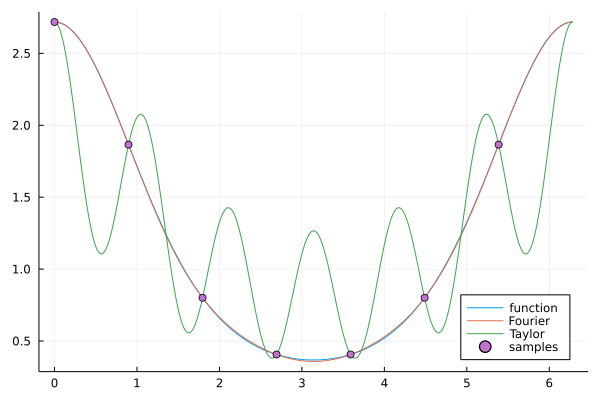

In [1]:
using Plots, LinearAlgebra


# evaluates f_n at a point
function finitefourier(𝐟̂ₙ, θ)
    m = n ÷ 2 # use coefficients between -m:m
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:m
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    for k = -m:-1
        ret += 𝐟̂ₙ[end+k+1] * exp(im*k*θ)
    end
    ret
end

function finitetaylor(𝐟̂ₙ, θ)
    ret = 0.0 + 0.0im # coefficients are complex so we need complex arithmetic
    for k = 0:n-1
        ret += 𝐟̂ₙ[k+1] * exp(im*k*θ)
    end
    ret
end


f = θ -> exp(cos(θ))
n = 7
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]
𝐟̂ₙ = 1/sqrt(n) * Qₙ * f.(θ)


fₙ = θ -> finitefourier(𝐟̂ₙ, θ)
tₙ = θ -> finitetaylor(𝐟̂ₙ, θ)

g = range(0, 2π; length=1000) # plotting grid
plot(g, f.(g); label="function", legend=:bottomright)
plot!(g, real.(fₙ.(g)); label="Fourier")
plot!(g, real.(tₙ.(g)); label="Taylor")
scatter!(θ, f.(θ); label="samples")

We now demonstrate the relationship of Taylor and Fourier coefficients
and their discrete approximations for some examples:

**Example** Consider the function
$$
f(θ) = {2 \over 2 - {\rm e}^{{\rm i} θ}}
$$
Under the change of variables $z = {\rm e}^{{\rm i} θ}$ we know for
$z$ on the unit circle this becomes (using the geometric series with $z/2$)
$$
{2 \over 2-z} = ∑_{k=0}^∞ {z^k \over 2^k}
$$
i.e., $f̂_k = 1/2^k$ which is absolutely summable:
$$
∑_{k=0}^∞ |f̂_k| = f(0) = 2.
$$
If we use an $n$ point discretisation we get (using the geoemtric series with $2^{-n}$)
$$
f̂_k^n = f̂_k + f̂_{k+n} + f̂_{k+n} + ⋯ = ∑_{p=0}^∞ {1 \over 2^{k+pn}} = {2^{n-k} \over 2^n - 1}
$$
We can verify this numerically:

In [2]:
f = θ -> 2/(2 - exp(im*θ))
n = 7
θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
Qₙ = 1/sqrt(n) * [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]

Qₙ/sqrt(n)*f.(θ) ≈ 2 .^ (n .- (0:n-1)) / (2^n-1)

true

## 4. Fast Fourier Transform

Applying $Qₙ$ or its adjoint $Q_n^⋆$ to a vector naively takes $O(n^2)$ operations.
Both can be reduced to $O(n \log n)$ using the celebrated _Fast Fourier Transform_ (FFT),
which is one of the [Top 10 Algorithms of the 20th Century](https://pi.math.cornell.edu/~web6140/)
(You won't believe number 7!).

The key observation is that hidden in $Q_{2n}$ are 2 copies of
$Q_n$. We will work with multiple $n$ we denote the $n$-th root as $ω_n = \exp(2π/n)$.
Note that we can relate a vector of powers of $ω_{2n}$ to two copies of vectors of powers of $ω_n$:
$$
\underbrace{\begin{bmatrix} 1 \\ ω_{2n} \\ ⋮ \\ ω_{2n}^{2n-1} \end{bmatrix}}_{\vec{ω}_{2n}} =
P_σ^⊤ \begin{bmatrix} I_n \\ ω_{2n} I_n \end{bmatrix} \underbrace{\begin{bmatrix} 1 \\ ω_n \\ ⋮ \\ ω_n^{n-1} \end{bmatrix}}_{\vec{ω}_n}
$$
where $σ$ has the Cauchy notation
$$
\begin{pmatrix}
1 & 2 & 3 & ⋯ & n & n+1 & ⋯ & 2n \\
1 & 3 & 5 & ⋯ & 2n-1 & 2 & ⋯ & 2n
\end{pmatrix}
$$
That is, $P_σ$ is the following matrix which takes the even entries
and places them in the first $n$ entries and the odd entries in the
last $n$ entries:

In [3]:
n = 4
σ = [1:2:2n-1; 2:2:2n]
P_σ = I(2n)[σ,:]

8×8 SparseMatrixCSC{Bool, Int64} with 8 stored entries:
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1

and so $P_σ^⊤$ reverses the process.
Thus we have
$$
\begin{align*}
Q_{2n}^⋆ &= {1 \over \sqrt{2n}} \begin{bmatrix} 𝟏_{2n} | \vec{ω}_{2n} | \vec{ω}_{2n}^2 | ⋯ | \vec{ω}_{2n}^{2n-1} \end{bmatrix}
= {1 \over \sqrt{2n}} P_σ^⊤ \begin{bmatrix} 𝟏_{n} &   \vec{ω}_n        & \vec{ω}_n^2          & ⋯ & \vec{ω}_n^{n-1}          & \vec{ω}_n^n  & ⋯ & \vec{ω}_n^{2n-1}  \\
                        𝟏_{n} & ω_{2n} \vec{ω}_n & ω_{2n}^2 \vec{ω}_n^2 & ⋯ & ω_{2n}^{n-1} \vec{ω}_n^{n-1} & ω_{2n}^n \vec{ω}_n^n  & ⋯ & ω_{2n}^{2n-1} \vec{ω}_n^{2n-1}
\end{bmatrix} \\
&= {1 \over \sqrt{2}} P_σ^⊤ \begin{bmatrix} Q_n^⋆ & Q_n^⋆ \\
                                     Q_n^⋆ D_n & -Q_n^⋆ D_n
                                     \end{bmatrix} =
                                     {1 \over \sqrt{2}}P_σ^⊤ \begin{bmatrix} Q_n^⋆ \\ &Q_n^⋆ \end{bmatrix} \begin{bmatrix} I_n & I_n \\ D_n & -D_n \end{bmatrix}
\end{align*}
$$
In other words, we reduced the DFT to two DFTs applied to vectors of half the dimension.

We can see this formula in code:

In [4]:
function fftmatrix(n)
    θ = range(0,2π; length=n+1)[1:end-1] # θ_0, …,θ_{n-1}, dropping θ_n == 2π
    [exp(-im*(k-1)*θ[j]) for k = 1:n, j=1:n]/sqrt(n)
end

Q₂ₙ = fftmatrix(2n)
Qₙ = fftmatrix(n)
Dₙ = Diagonal([exp(im*k*π/n) for k=0:n-1])
(P_σ'*[Qₙ' Qₙ'; Qₙ'*Dₙ -Qₙ'*Dₙ])[1:n,1:n] ≈ sqrt(2)Q₂ₙ'[1:n,1:n]

true

Now assume $n = 2^q$ so that $\log_2 n = q$. To see that we get $O(n \log n) = O(n q)$ operations we need to count the operations.
Assume that applying $F_n$ takes $≤3n q$ additions and multiplications. The first $n$ rows takes $n$ additions. The last $n$ has $n$ multiplications and $n$ additions.
Thus we have $6nq + 3n ≤ 6n(q+1) = 3 (2n) \log_2(2n)$ additions/multiplications, showing by induction that we have $O(n \log n)$ operations.



**Remark** The FFTW.jl package wraps the FFTW (Fastest Fourier Transform in the West) library,
which is a highly optimised implementation
of the FFT that also works well even when $n$ is not a power of 2.
(As an aside, the creator of FFTW [Steven Johnson](https://math.mit.edu/~stevenj/) is now a
Julia contributor and user.)
 Here we approximate $\exp(\cos(θ-0.1))$ using
31 nodes:

┌ Info: Precompiling FFTW [7a1cc6ca-52ef-59f5-83cd-3a7055c09341]
└ @ Base loading.jl:1423


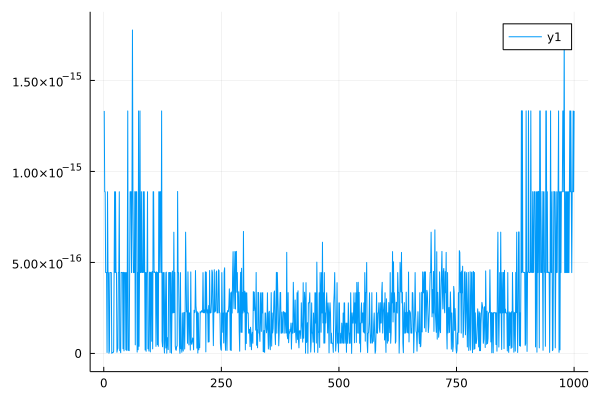

In [5]:
using FFTW
f = θ -> exp(cos(θ-0.1))
n = 31
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n

# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

# equivalent to f̂ⁿ_(-m)*exp(-im*m*θ) + … + f̂ⁿ_(m)*exp(im*m*θ)
fₙ = θ -> transpose([exp(im*k*θ) for k=-m:m]) * f̂

# plotting grid
g = range(0, 2π; length=1000)
plot(abs.(fₙ.(g) - f.(g)))

Thus we have successfully approximate the function to roughly machine precision.
The magic of the FFT is because it's $O(n \log n)$ we can scale it to very high orders.
Here we plot the Fourier coefficients for a function that requires around 100k
coefficients to resolve:

In [6]:
f = θ -> exp(sin(θ))/(1+1e6cos(θ)^2)
n = 100_001
m = n÷2
# evenly spaced points from 0:2π, dropping last node
θ = range(0, 2π; length=n+1)[1:end-1]

# fft returns discrete Fourier coefficients n*[f̂ⁿ_0, …, f̂ⁿ_(n-1)]
fc = fft(f.(θ))/n


# We reorder using [f̂ⁿ_(-m), …, f̂ⁿ_(-1)] == [f̂ⁿ_(n-m), …, f̂ⁿ_(n-1)]
#  == [f̂ⁿ_(m+1), …, f̂ⁿ_(n-1)]
f̂ = [fc[m+2:end]; fc[1:m+1]]

plot(abs.(fc); yscale=:log10, legend=:bottomright, label="default")
plot!(abs.(f̂); yscale=:log10, label="reordered")

We can use the FFT to compute some mathematical objects efficiently.
Here is a simple example.

**Example** Define the following infinite sum (which has no name apparently,
according to Mathematica):
$$
S_n(k) := ∑_{p=0}^∞ {1 \over (k+pn)!}
$$
We can use the FFT to compute $S_n(0), …, S_n(n-1)$ in $O(n \log n)$ operations.
Consider
$$
f(θ) = \exp({\rm e}^{{\rm i} θ}) = ∑_{k=0}^∞ {{\rm e}^{{\rm i} k θ} \over k!}
$$
where we know the Fourier coefficients from the Taylor series of ${\rm e}^z$. 
The discrete Fourier coefficients satisfy for $0 ≤ k ≤ n-1$:
$$
f̂_k^n = f̂_k + f̂_{k+n} + f̂_{k+2n} + ⋯ = S_n(k)
$$
Thus we have
$$
\begin{bmatrix}
S_n(0) \\ 
⋮ \\
S_n(n-1)
\end{bmatrix} = {1 \over \sqrt{n}} Q_n \begin{bmatrix} 1 \\
                                \exp({\rm e}^{2{\rm i} π/n}) \\
                                ⋮ \\
                                \exp({\rm e}^{2{\rm i} (n-1) π/n}) \end{bmatrix}
$$